## SVM support vector machine
* 분류나 회귀분석에 사용가능한 기법
    + 분류쪽 성능이 뛰어나서 주로 분류에 많이 사용
* 신경망에 비해 간결해서 뛰어난 성능을 보여준 탓에 신경망에 암흑기를 가져다 준 대표적인 머신러닝 알고리즘
* 이미지 인식이나 필체패턴 인식과 같은 작업에 주로 사용
* 마진을 최대로 하는 결정경계를 찾는 것이 SVM의 주된 알고리즘
* 결정경계는 서로 다른 분류값을 결정짓는 경계
    + line, plane(2D), hyperplane(3D)
* 마진은 결정경계와 서포트벡터간의 거리를 의미
* 서포트벡터는 결정경계를 만드는데 영향을 주는 최전방 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.datasets import make_blobs

## 선형으로 분류가 가능한 예
* 점들이 두 집단으로 잘 분류된 예제

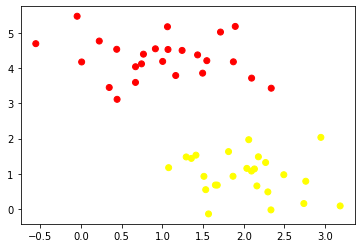

In [2]:
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.6, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

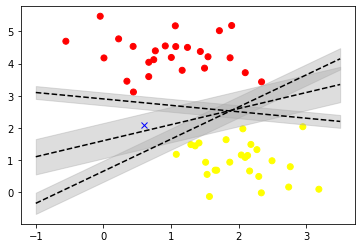

In [3]:
# 빨간점과 노란점으로 구성된 집합을 적절히 구분하려고 할떄 3개의 직선중 어느것이 가장 최적으로 분류한 것일까?
# 두 개의 데이터 집합을 잘 분리하는 직선을 그려보자
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

plt.plot([0.6],[2.1], 'x', color='blue')  # 테스트 점

# 3개의 직선 긋기
xfit = np.linspace(-1, 3.5)

for m,b,d in [(1 ,0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, 'k--')
    plt.fill_between(xfit, yfit-d, yfit+d, color='#AAAAAA', alpha=0.4)


In [4]:
# 가운데 직선은 다른 두 직선에 비해 비교적 여유(마진)있게  두 집합을 가르고 있다.
# 이 덕에 테스트 점 역시 여유있게 분류 가능하다.
# 이렇게 최적으로 분류할 수 있는 직선을 통해 나눠지는 영역을 초평면(hyperplane)이라 한다

## SVM을 이용해서 초평면 구해보자

In [5]:
from sklearn.svm import SVC

In [6]:
# kernel : 초평면 알고리즘 지정
svc = SVC(kernel='linear')
svc.fit(X,y)

SVC(kernel='linear')

In [7]:
# 초평면/서포트 벡터 정보 
svc.coef_[0][0], svc.coef_[0][1]  # 회귀계수
svc.intercept_[0]      # 절편
svc.support_vectors_   # 서포트벡터

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

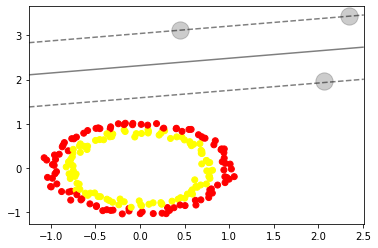

In [15]:
## 결정경게 시각화
import svm_visual
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], alpha=0.2, s=300, facecolor='k') # 서포트벡터 표시

svm_visual.plot_svc_decision_function(svc)

# ax = plt.gca()    # 그래프 축정보 알아내기
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# x = np.linspace(xlim[0], xlim[1], 30)
# y = np.linspace(ylim[0], ylim[1], 30)

# Y, X = np.meshgrid(y, x)
# xy = np.vstack([X.ravel(), Y.ravel()]).T # 전치행렬

# # 각 점에 대한 결정영역을 나타내는 함수
# # 값이 음수이면 음성을, 양수이면 양성을 의미
# P = svc.decision_function(xy).reshape(X.shape)

# # 초평면을 나누는 결정경계에 몰리는 점들 예측
# ax.contour(X, Y, P, colors='k', levels=[-1,0,1], alpha=0.5, linestyle=['--','-','--'])

# # 결정경계에 몰리는 점들을 시각적으로 표시 : 등고선
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)

## 비선형 분류
* 선형적으로 분류가 불가능한 경우에 대해서도 초평면을 구할 수 있을까>

In [9]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, noise=0.04, random_state=0)

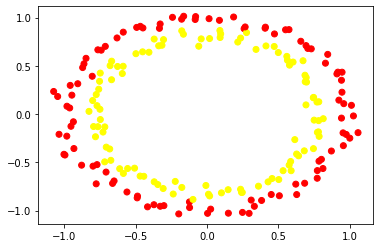

In [10]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

# plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], alpha=0.2, s=300, facecolor='k') # 서포트벡터 표시

## 커널 트릭 
* 구분이 불가능한 집합은 구분이 가능한 방향으로 맵핑시킨 새로운 공간에서는 구분이 가능할 것이다.
* 차원을 변환시키는 mapping함수를 통해 기존의 2차원 공간에 새로운 차원을 추가해서 3차원으로 변환할 수 있다면 선형적으로 구분이 가능해 진다.
* 선형적으로 불가능한 차원을 선형적으로 구분이 가능한 고차원으로 변환하는 것을 커널 트릭이라 하고 이때 사용하는 함수를 커널 함수라 함
* 대표적인 커널함수는 카우시안 커널RBF이고 이것을 통해 무산대 차원으로 매핑 가능

In [11]:
## 2차원 데이터를 3차원으로 변환 후 시각화 
from mpl_toolkits.mplot3d import Axes3D

X, y = make_circles(n_samples=200, noise=0.04, random_state=0)

In [64]:
# 커널함수 : 2차원을 3차원으로 변환
z = np.exp(-(X ** 2).sum(1))

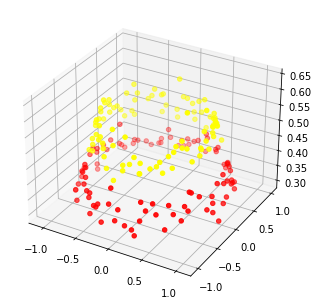

In [66]:
# 3차원으로 시각화
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:,0], X[:,1], z, c=y, cmap='autumn')

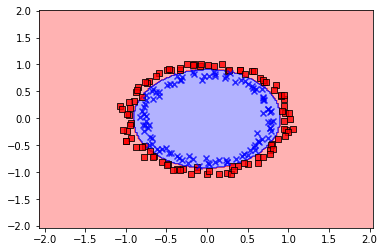

In [17]:
import svm_visual

# SVC 초매개변수
# C(cost) : 규제 매개변수(정확도 제한), 
# gamma : 결정경계 곡률(마진)조정(값이 크면 결정경계면은 좁아짐)
svc = SVC(kernel='rbf', C=10.0, gamma=0.1, random_state=0)
svc.fit(X,y)
svc.score(X,y)
svm_visual.plot_decision_regions(X,y,svc)

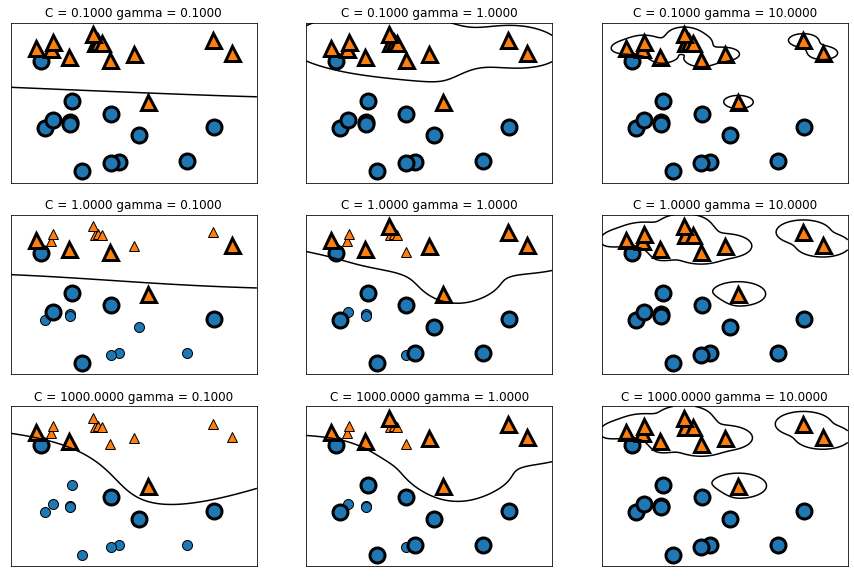

In [25]:
## SVM 규제/감마 매개변수 알아보기
import mglearn

fig,axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

In [27]:
## iris 데이터를 SVM의 RBF커널로 분석
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
iris = load_iris()

# data = iris.data[:, 0:2]
data = iris.data[:, 2:]
target = iris.target


In [37]:
# 데이터 분할
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, stratify= target, test_size = 0.3, random_state=2111171155)

In [38]:
svc = SVC(kernel = 'rbf')
svc.fit(Xtrain, ytrain)
pred = svc.predict(Xtest)

# 정확도
svc.score(Xtrain, ytrain), accuracy_score(pred, ytest)

(0.9428571428571428, 0.9333333333333333)

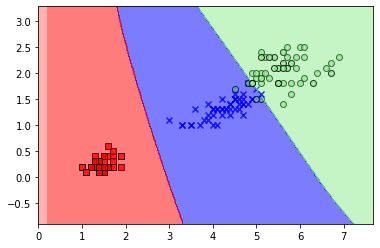

In [39]:
svm_visual.plot_decision_regions(Xtrain, ytrain, svc)
svm_visual.plot_decision_regions(Xtest, ytest, svc)


In [42]:
# fresh.csv 이용해서 달콤함과 아삭함에 따른 
# 과일, 채소, 단백질 분류분석을 SVM으로 실시하세요
# ex) 당도가 6, 아삭함이 4인 개체는 무엇으로 분류되는가?

fresh = pd.read_csv('csv/fresh.csv', encoding='euc-kr')
fresh.head()


,이름,단맛,아삭거림,범주
0,포도,8,5,과일
1,생선,2,2,단백질
2,당근,6,10,채소
3,오렌지,7,3,과일
4,샐러리,3,8,채소


In [53]:
data = fresh.iloc[:, [1,2]]
target = fresh.범주

In [54]:
# 레이블 인코딩
target = target.map({'과일':0, '단백질':1, '채소':2})

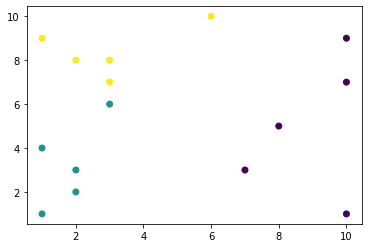

In [56]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=target)

In [96]:
# svc = SVC(kernel='rbf', C=10)
# svc = SVC(kernel='rbf', C=30, gamma=0.0001)
svc = SVC(kernel='rbf', C=10, gamma=1000)
svc.fit(data, target)
svc.score(data, target)

1.0

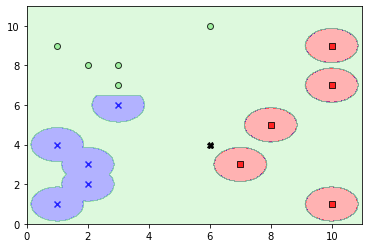

In [97]:
svm_visual.plot_decision_regions(np.array(data), np.array(target), svc)
plt.plot(6, 4, 'kX')

In [79]:
svc.predict([[6,4]])

array([0])